In [1]:
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (30, 30)
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
path = 'results/Auto/genero-m1_es_adjetivocolores-m2.xlsx'
df = pd.read_excel('../' + path)
df

Unnamed: 0    type  test_uid    score_m    score_f  \
0             0  simple         1 -20.879981  -7.668495   
1             1  simple         2 -19.463654  -8.418145   
2             2  simple         3 -21.023706  -8.439474   
3             3  simple         4 -18.758879  -6.495866   
4             4  simple         5 -20.314156  -7.599558   
..          ...     ...       ...        ...        ...   
395         395  simple       396 -12.348877 -11.951503   
396         396  simple       397 -12.016162 -19.882869   
397         397  simple       398 -11.118802 -13.778945   
398         398  simple       399  -7.650198 -11.407782   
399         399  simple       400 -16.311007 -20.718667   

             masked_sentence_m      masked_sentence_f target_value_m  \
0              [MASK] es adobe        [MASK] es adobe             él   
1        [MASK] es albaricoque  [MASK] es albaricoque             él   
2            [MASK] es almagre      [MASK] es almagre             él   
3           [MASK] es almendra     [MASK] es almendra             él   
4    [MASK] es amarillo pálido     [MASK] es amarillo             él   
..                         ...                    ...            ...   
395         [MASK] es turquesa     [MASK] es turquesa          aquel   
396           [MASK] es turquí       [MASK] es turquí          aquel   
397            [MASK] es verde        [MASK] es verde          aquel   
398             [MASK] es vino         [MASK] es vino          aquel   
399           [MASK] es violín       [MASK] es violín          aquel   

    target_value_f  
0             ella  
1             ella  
2             ella  
3             ella  
4             ella  
..             ...  
395        aquella  
396        aquella  
397        aquella  
398        aquella  
399        aquella  

[400 rows x 9 columns]

In [3]:
data = df.values
data

array([[0, 'simple', 1, ..., '[MASK] es adobe', 'él', 'ella'],
       [1, 'simple', 2, ..., '[MASK] es albaricoque', 'él', 'ella'],
       [2, 'simple', 3, ..., '[MASK] es almagre', 'él', 'ella'],
       ...,
       [397, 'simple', 398, ..., '[MASK] es verde', 'aquel', 'aquella'],
       [398, 'simple', 399, ..., '[MASK] es vino', 'aquel', 'aquella'],
       [399, 'simple', 400, ..., '[MASK] es violín', 'aquel', 'aquella']],
      dtype=object)

<AxesSubplot:xlabel='score_m'>

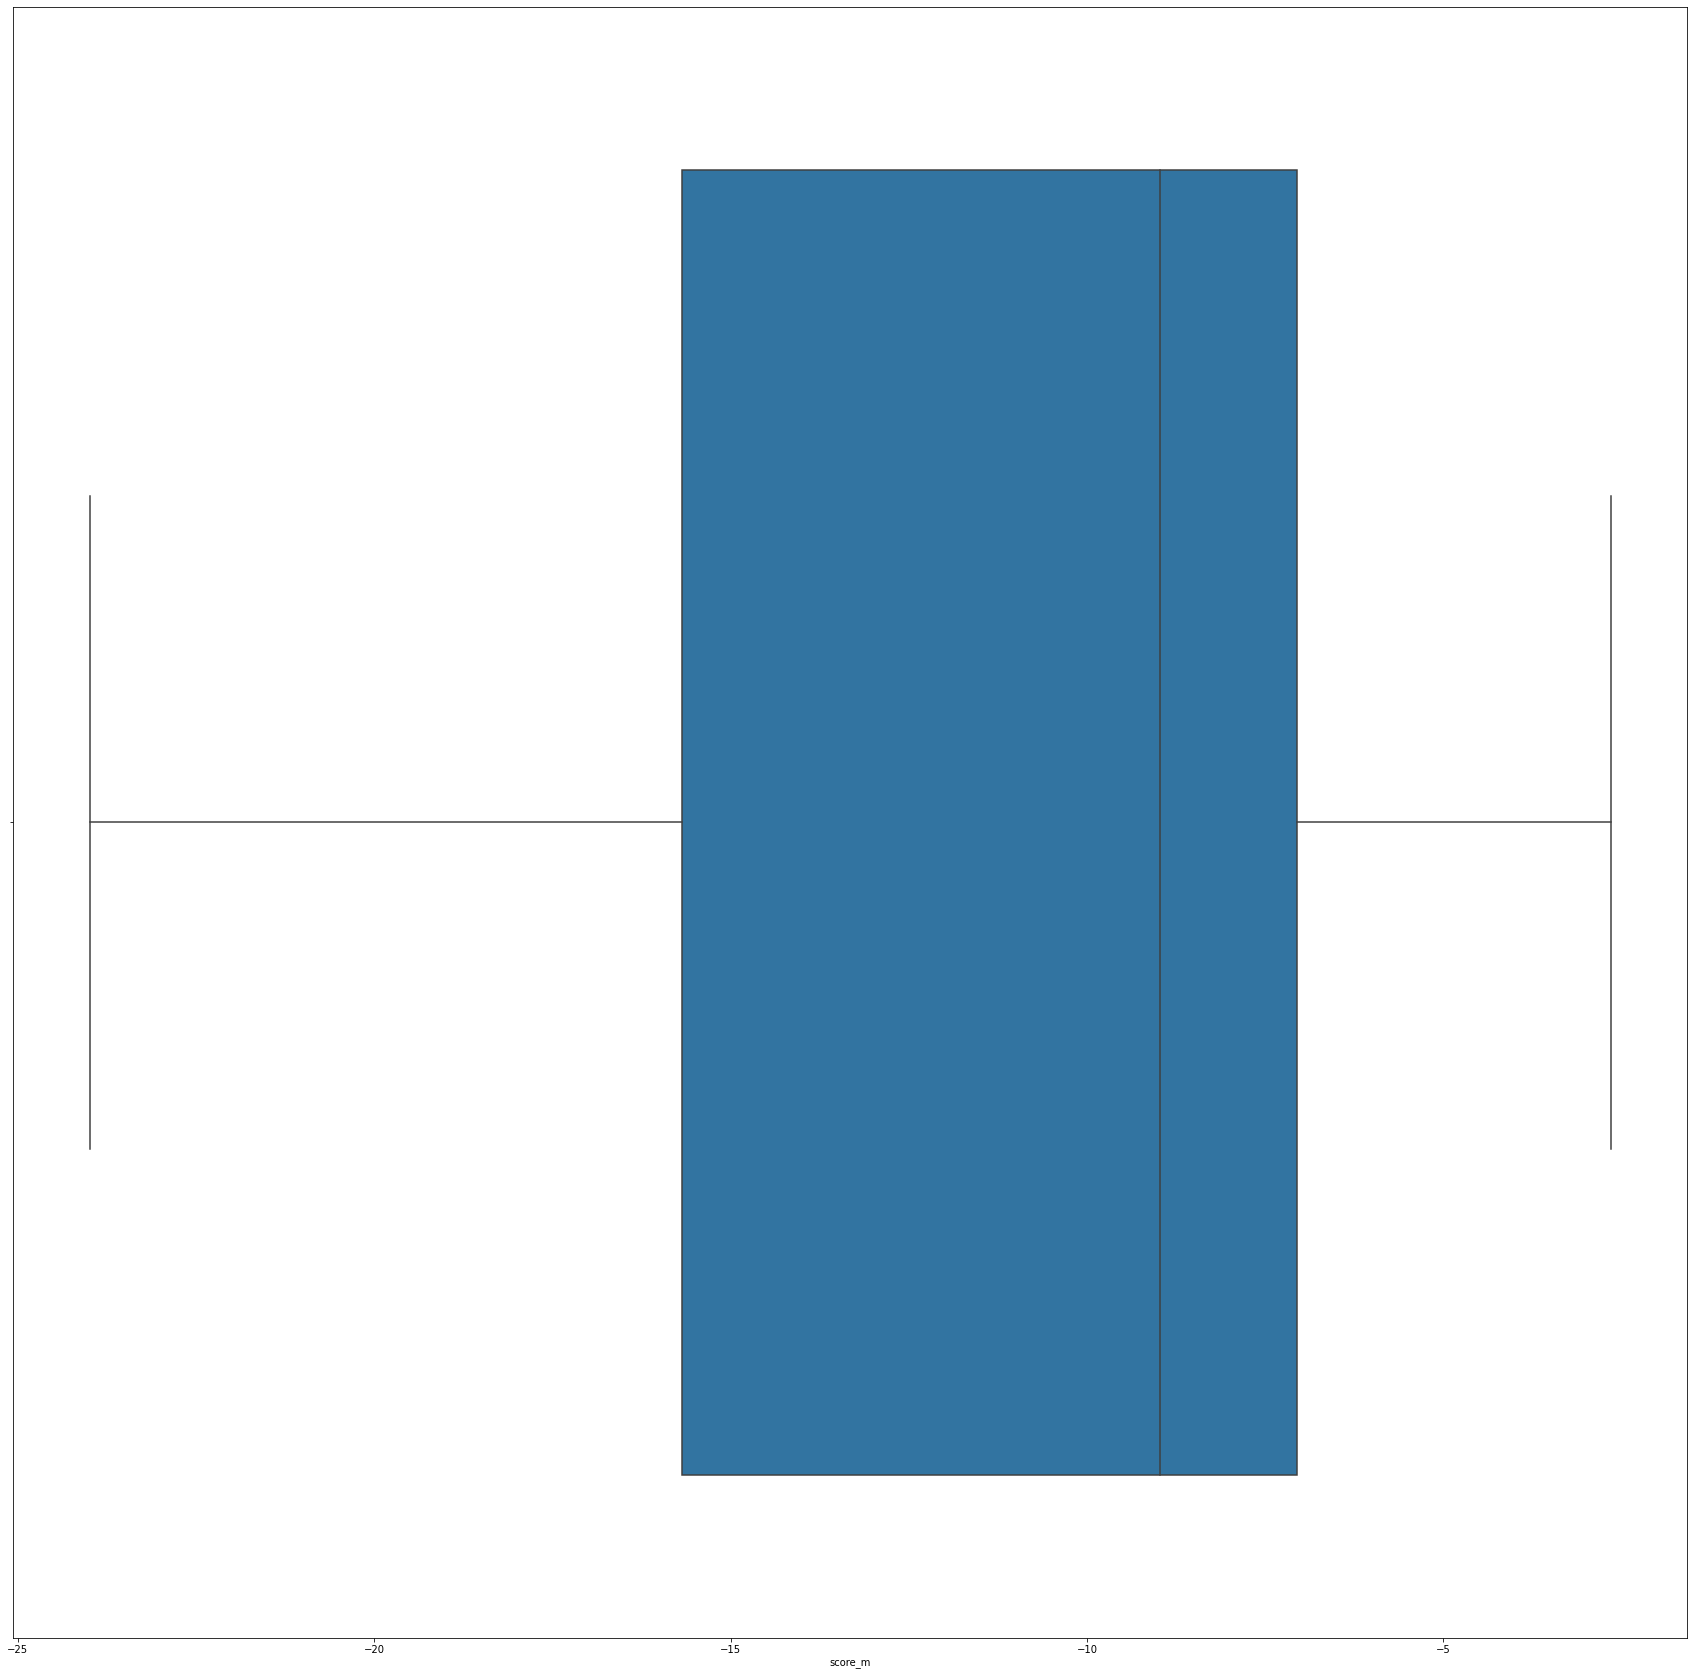

In [4]:
sns.boxplot(x=df['score_m'])

<AxesSubplot:xlabel='score_f'>

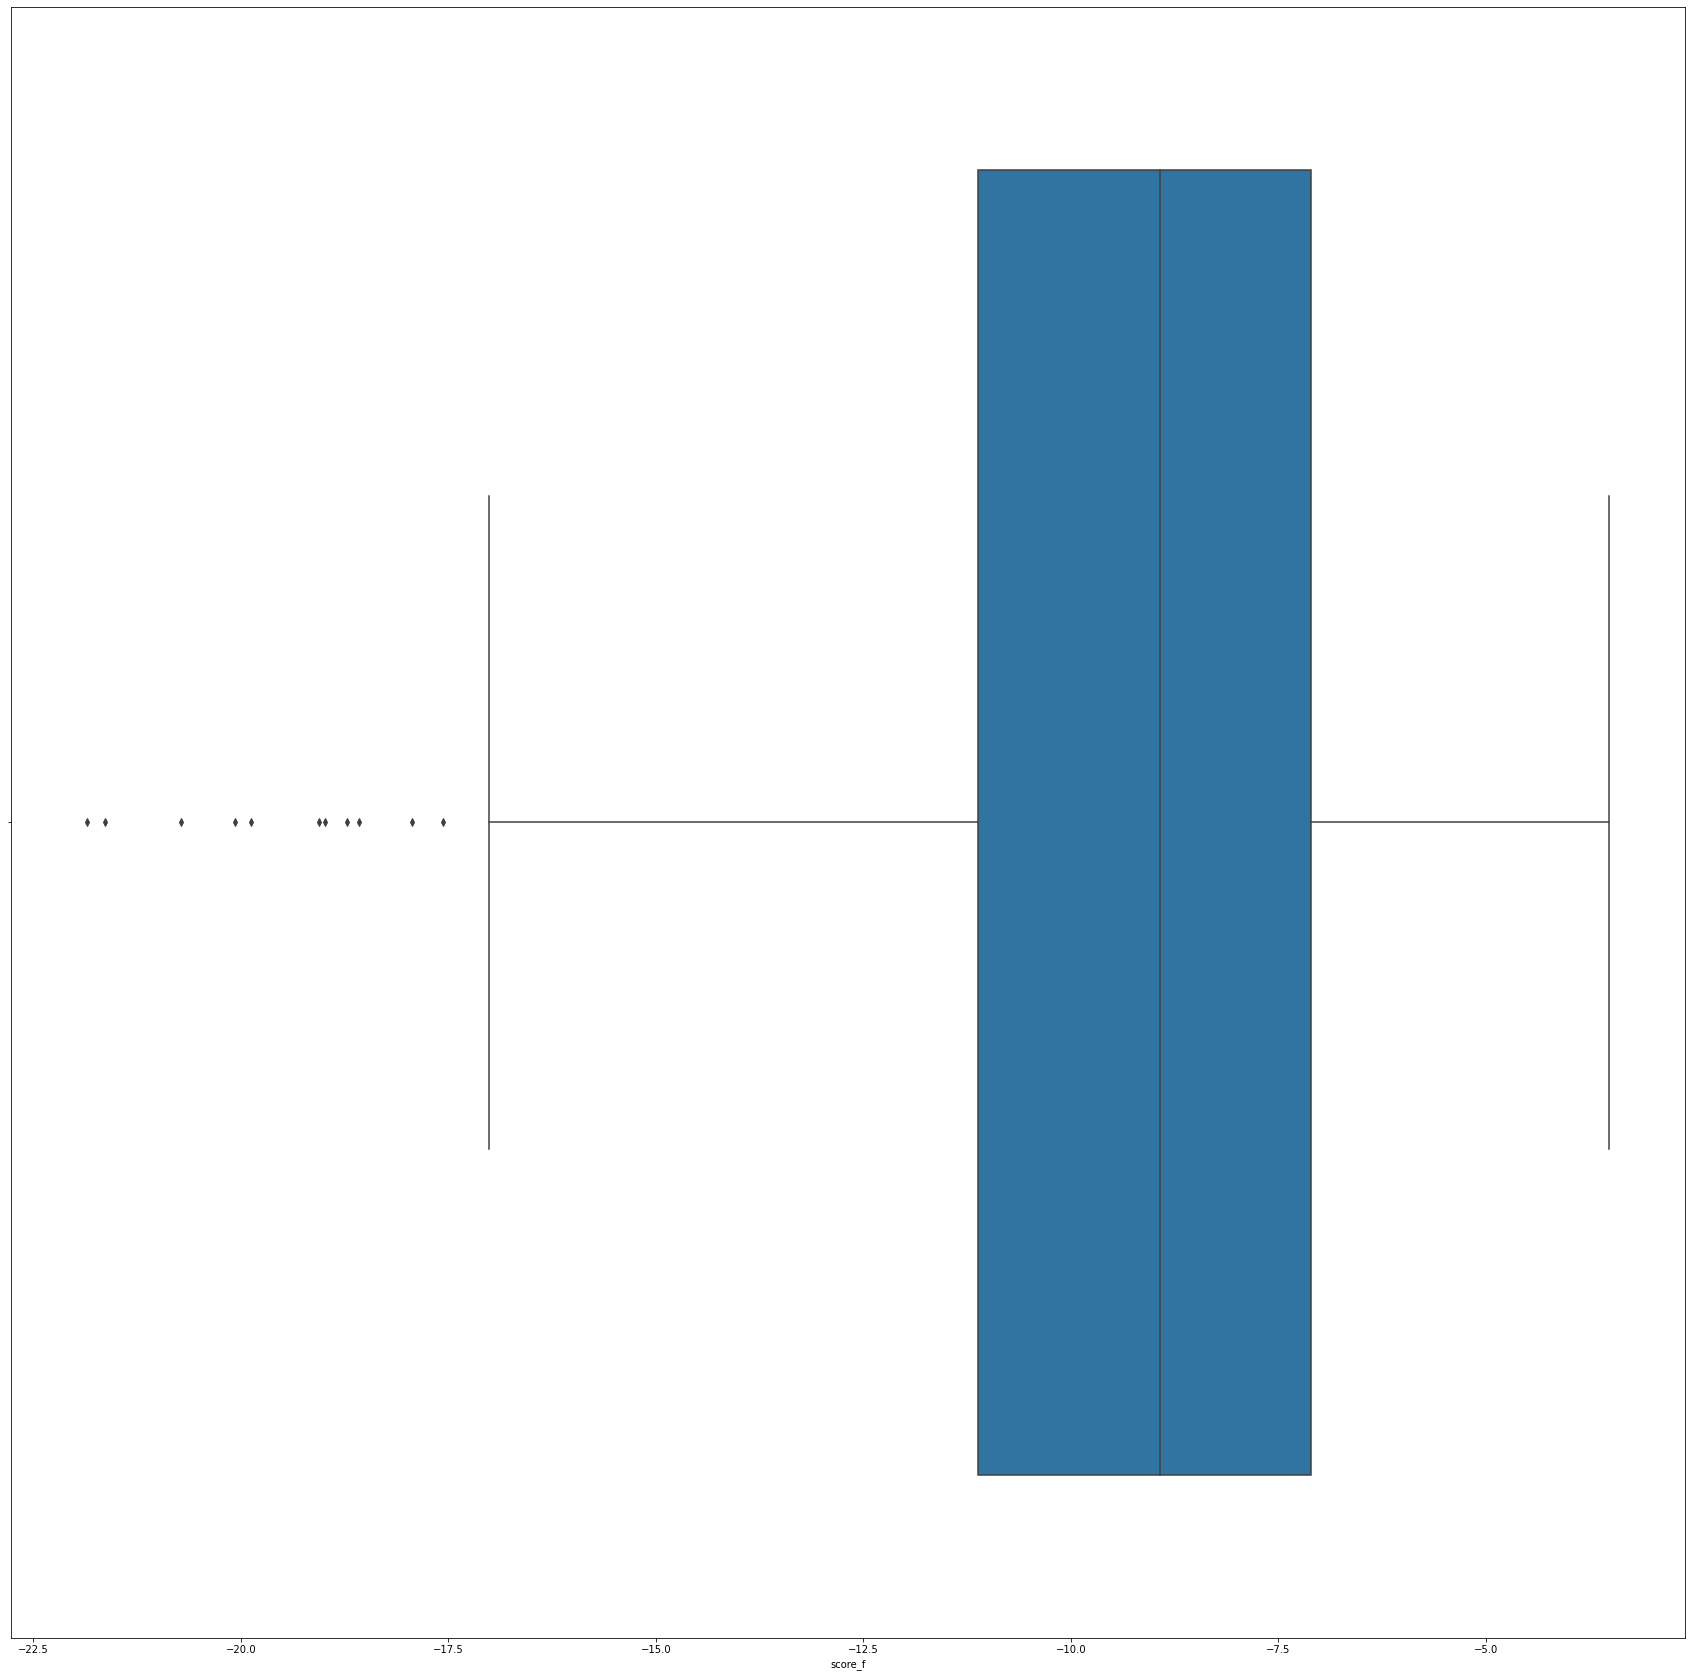

In [5]:
sns.boxplot(x=df['score_f'])

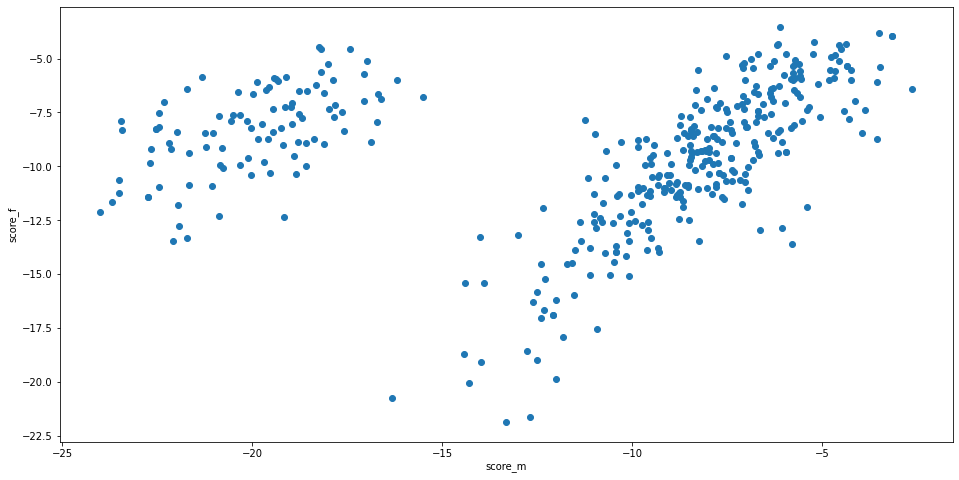

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['score_m'], df['score_f'])
ax.set_xlabel('score_m')
ax.set_ylabel('score_f')
plt.show()

    

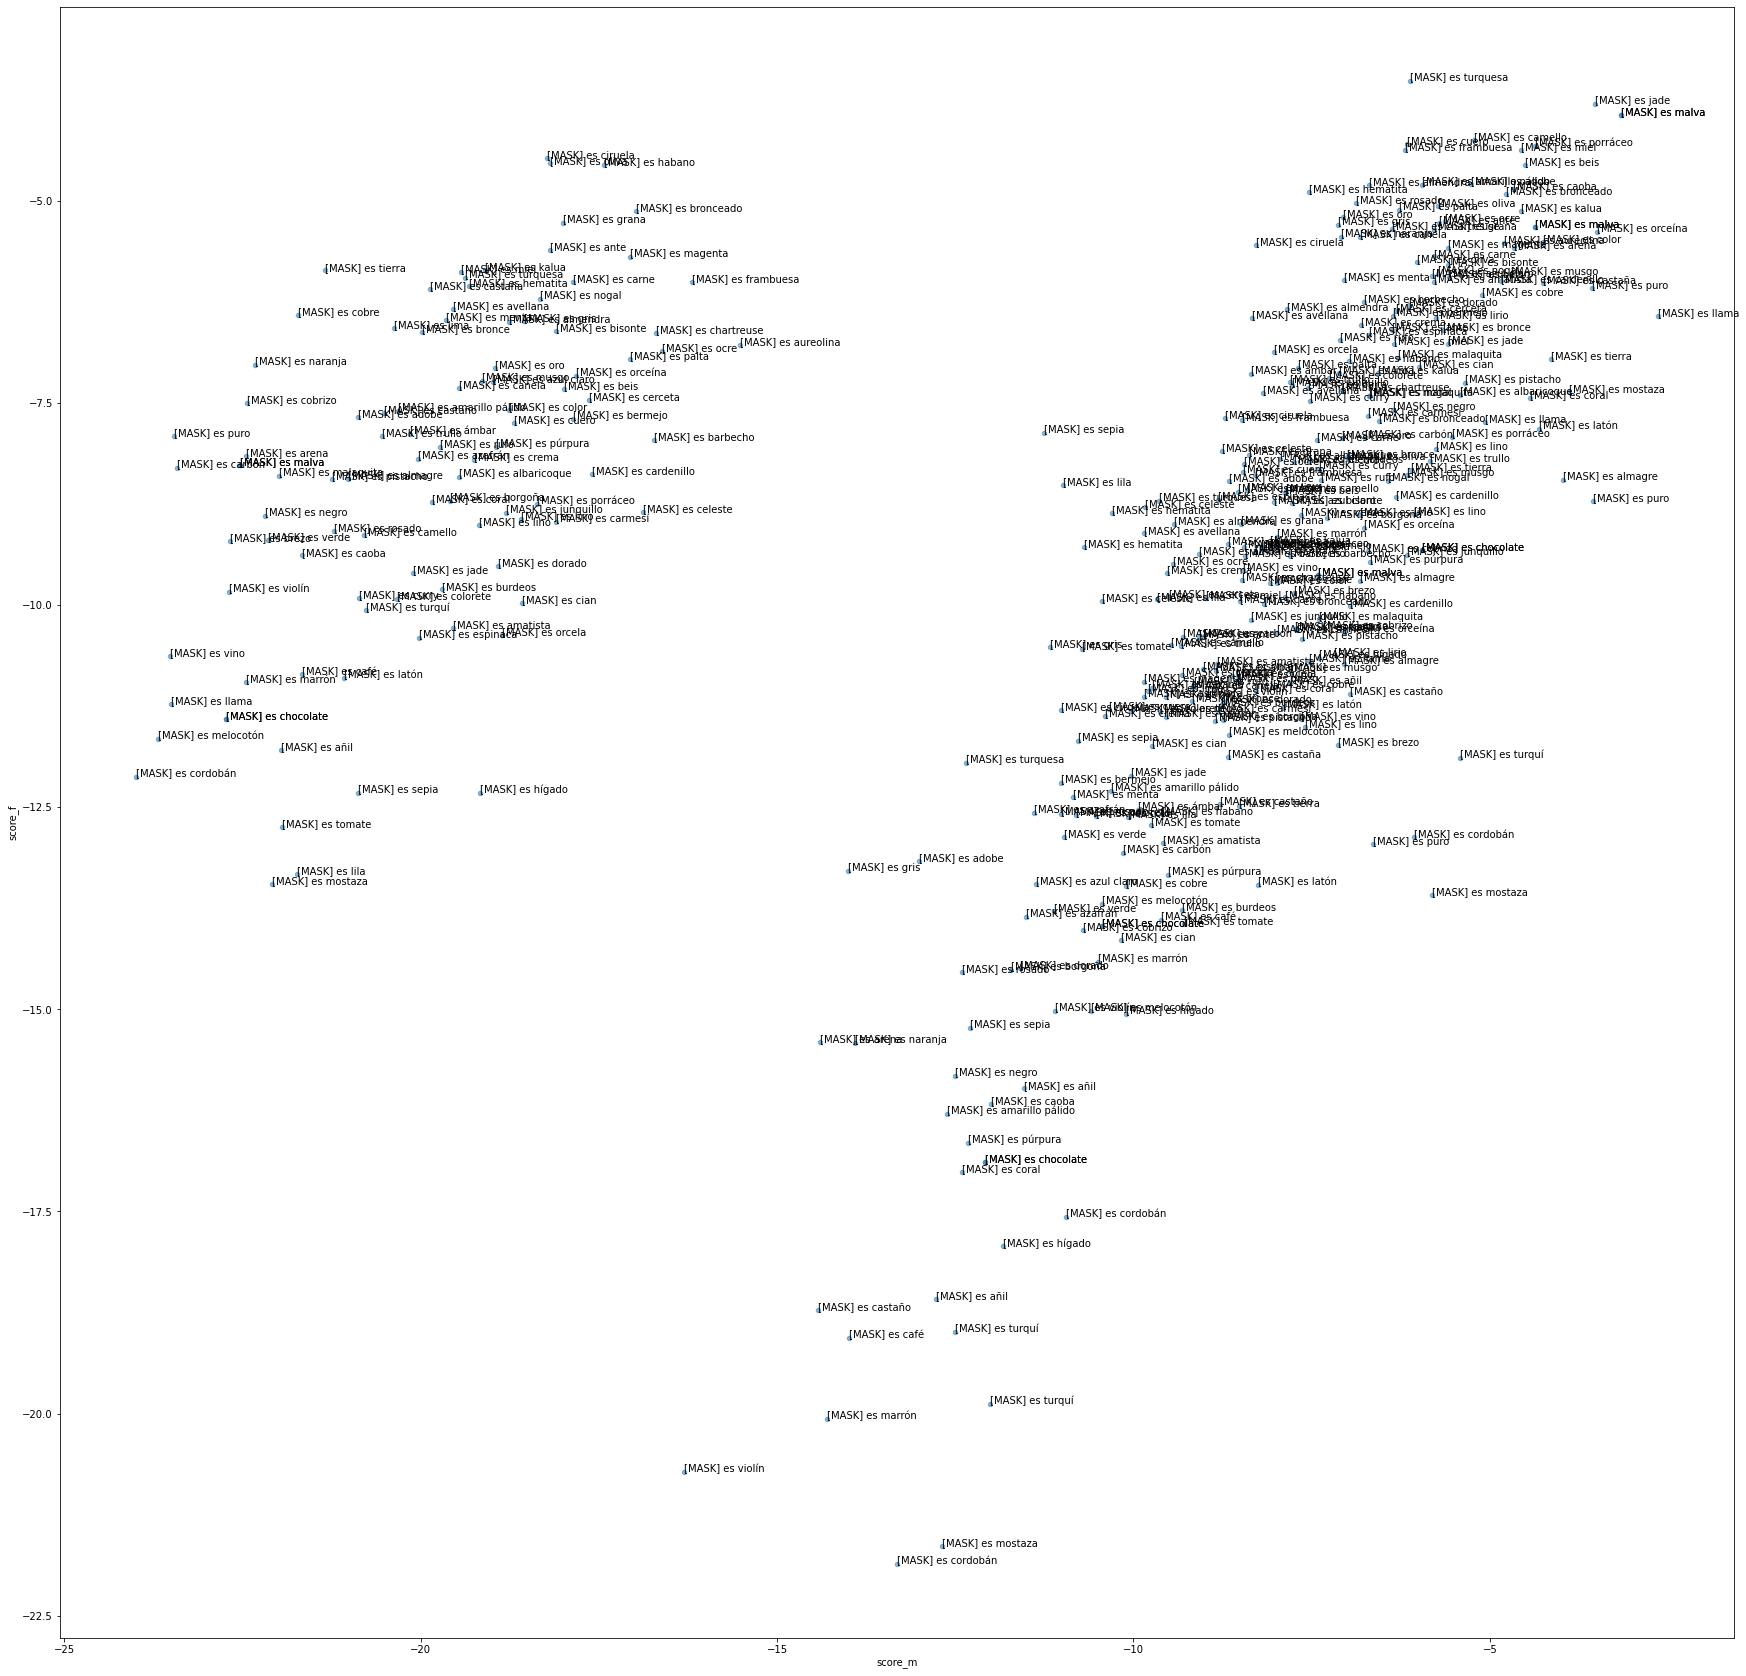

In [7]:
ax = df.plot.scatter(x='score_m', y='score_f', alpha=0.5)
for i, txt in enumerate(df["masked_sentence_m"]):
    ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
plt.show()   


In [23]:

def read(path):
    return pd.read_excel('../' + path)

def show_scatter(df, labels):
    ax = df.plot.scatter(x='score_m', y='score_f', alpha=1)
    
    if labels: 
        for i, txt in enumerate(df["masked_sentence_m"]):
            ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
        
    plt.show()

    
def normalize(df):
    result = df.copy()
    df_num = df.select_dtypes(include=[np.number])
    for feature_name in df_num.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def plot_file(path, labels = False):
    
    df = read(path)
    show_scatter(df, labels)

def plot_file_norm(path, labels = False):
    df = read(path)
    dfn = normalize(df)
    show_scatter(dfn, labels)

TREE = 0.001

def plot_file_norm_filter(path, labels = False):
    df = read(path)
    dfn = df
    
    dfn = normalize(df)
    dfn = dfn[(dfn['score_m'] < TREE ) & (dfn['score_f'] < TREE)]

    show_scatter(dfn, labels)


# http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python
def plot_clusters(path):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    cluster(df_num)

def plot_clusters_fixed(path):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    fixed_clusters(df_num)

def cluster(df_escalado):
    nc = range(1, 30) # El número de iteraciones que queremos hacer.
    kmeans = [KMeans(n_clusters=i) for i in nc]
    score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
    score
    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    plt.plot(nc,score)
    print(nc, score)
    
    labels = kmeans.predict(df_escalado)
    df['label'] = labels

def fixed_clusters(df_escalado, qty = 2):
    #%% Curva elbow para determinar valor óptimo de k.
    kmeans = KMeans(n_clusters=qty).fit(df_escalado)
    centroids = kmeans.cluster_centers_
    print(centroids)
    score = kmeans.score(df_escalado)

    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    print(qty,score)
    

def draw_cluster(df_escalado):
    colores=['red','green','blue','yellow','fuchsia']
    asignar=[]
    for row in labels:
        asignar.append(colores[row])
        plt.scatter(x, y, c=asignar, s=1)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
        plt.xlabel('score_m')
        plt.ylabel('score_f')
        plt.title('k-means clustering')
        plt.show()

def plot_all(path, labels = False):
    plot_file(path, labels)
    plot_file_norm(path, labels)
    plot_clusters(path)
    plot_clusters_fixed(path)

    

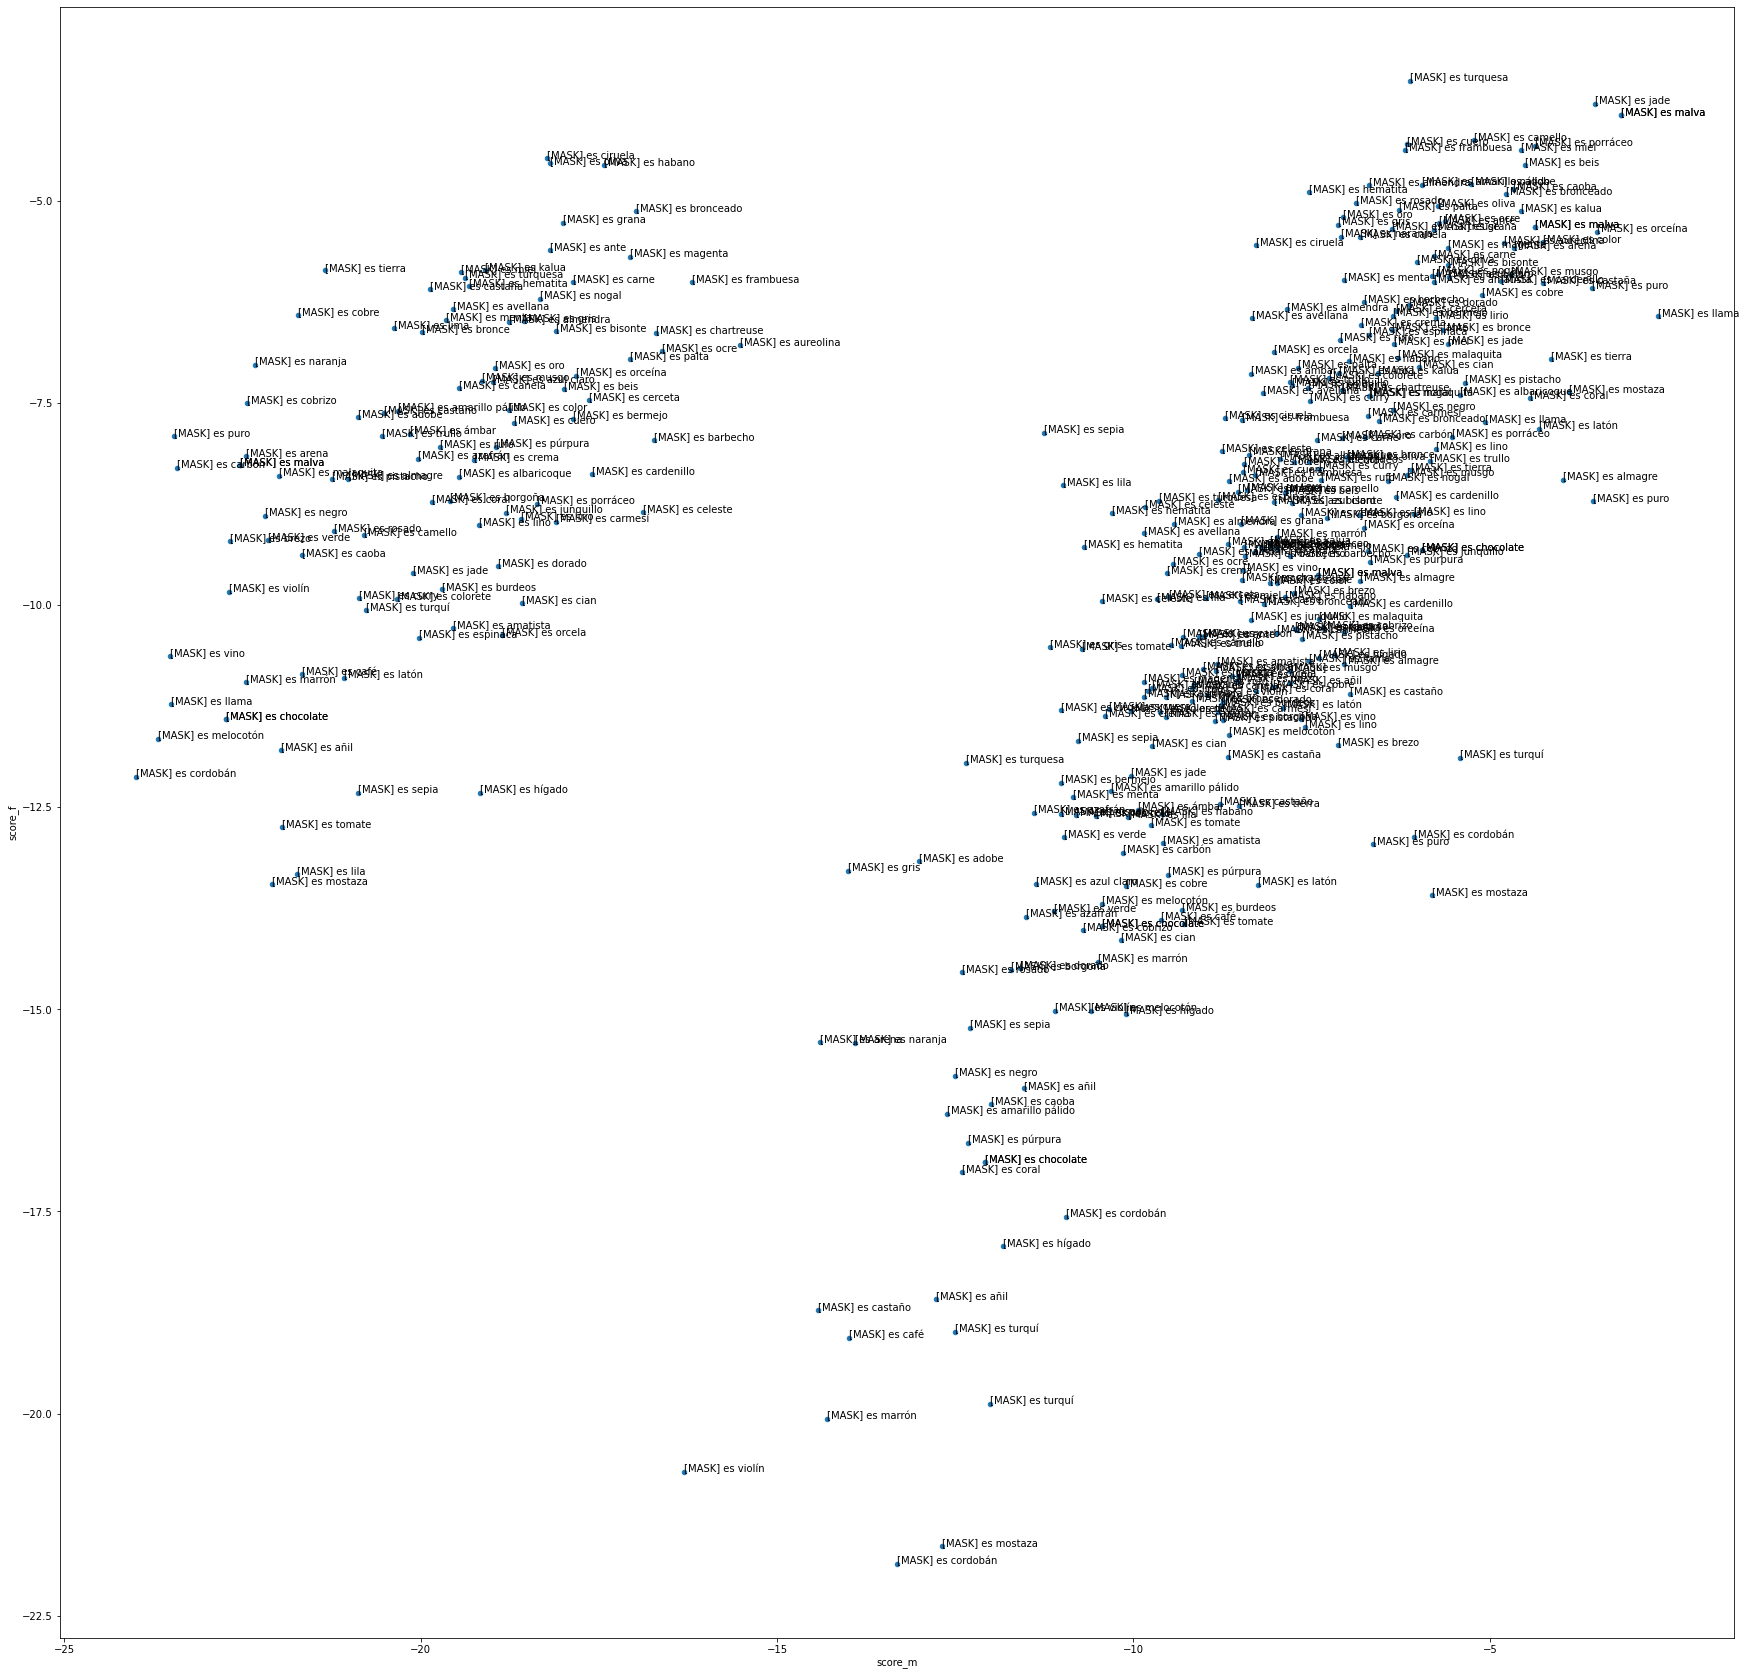

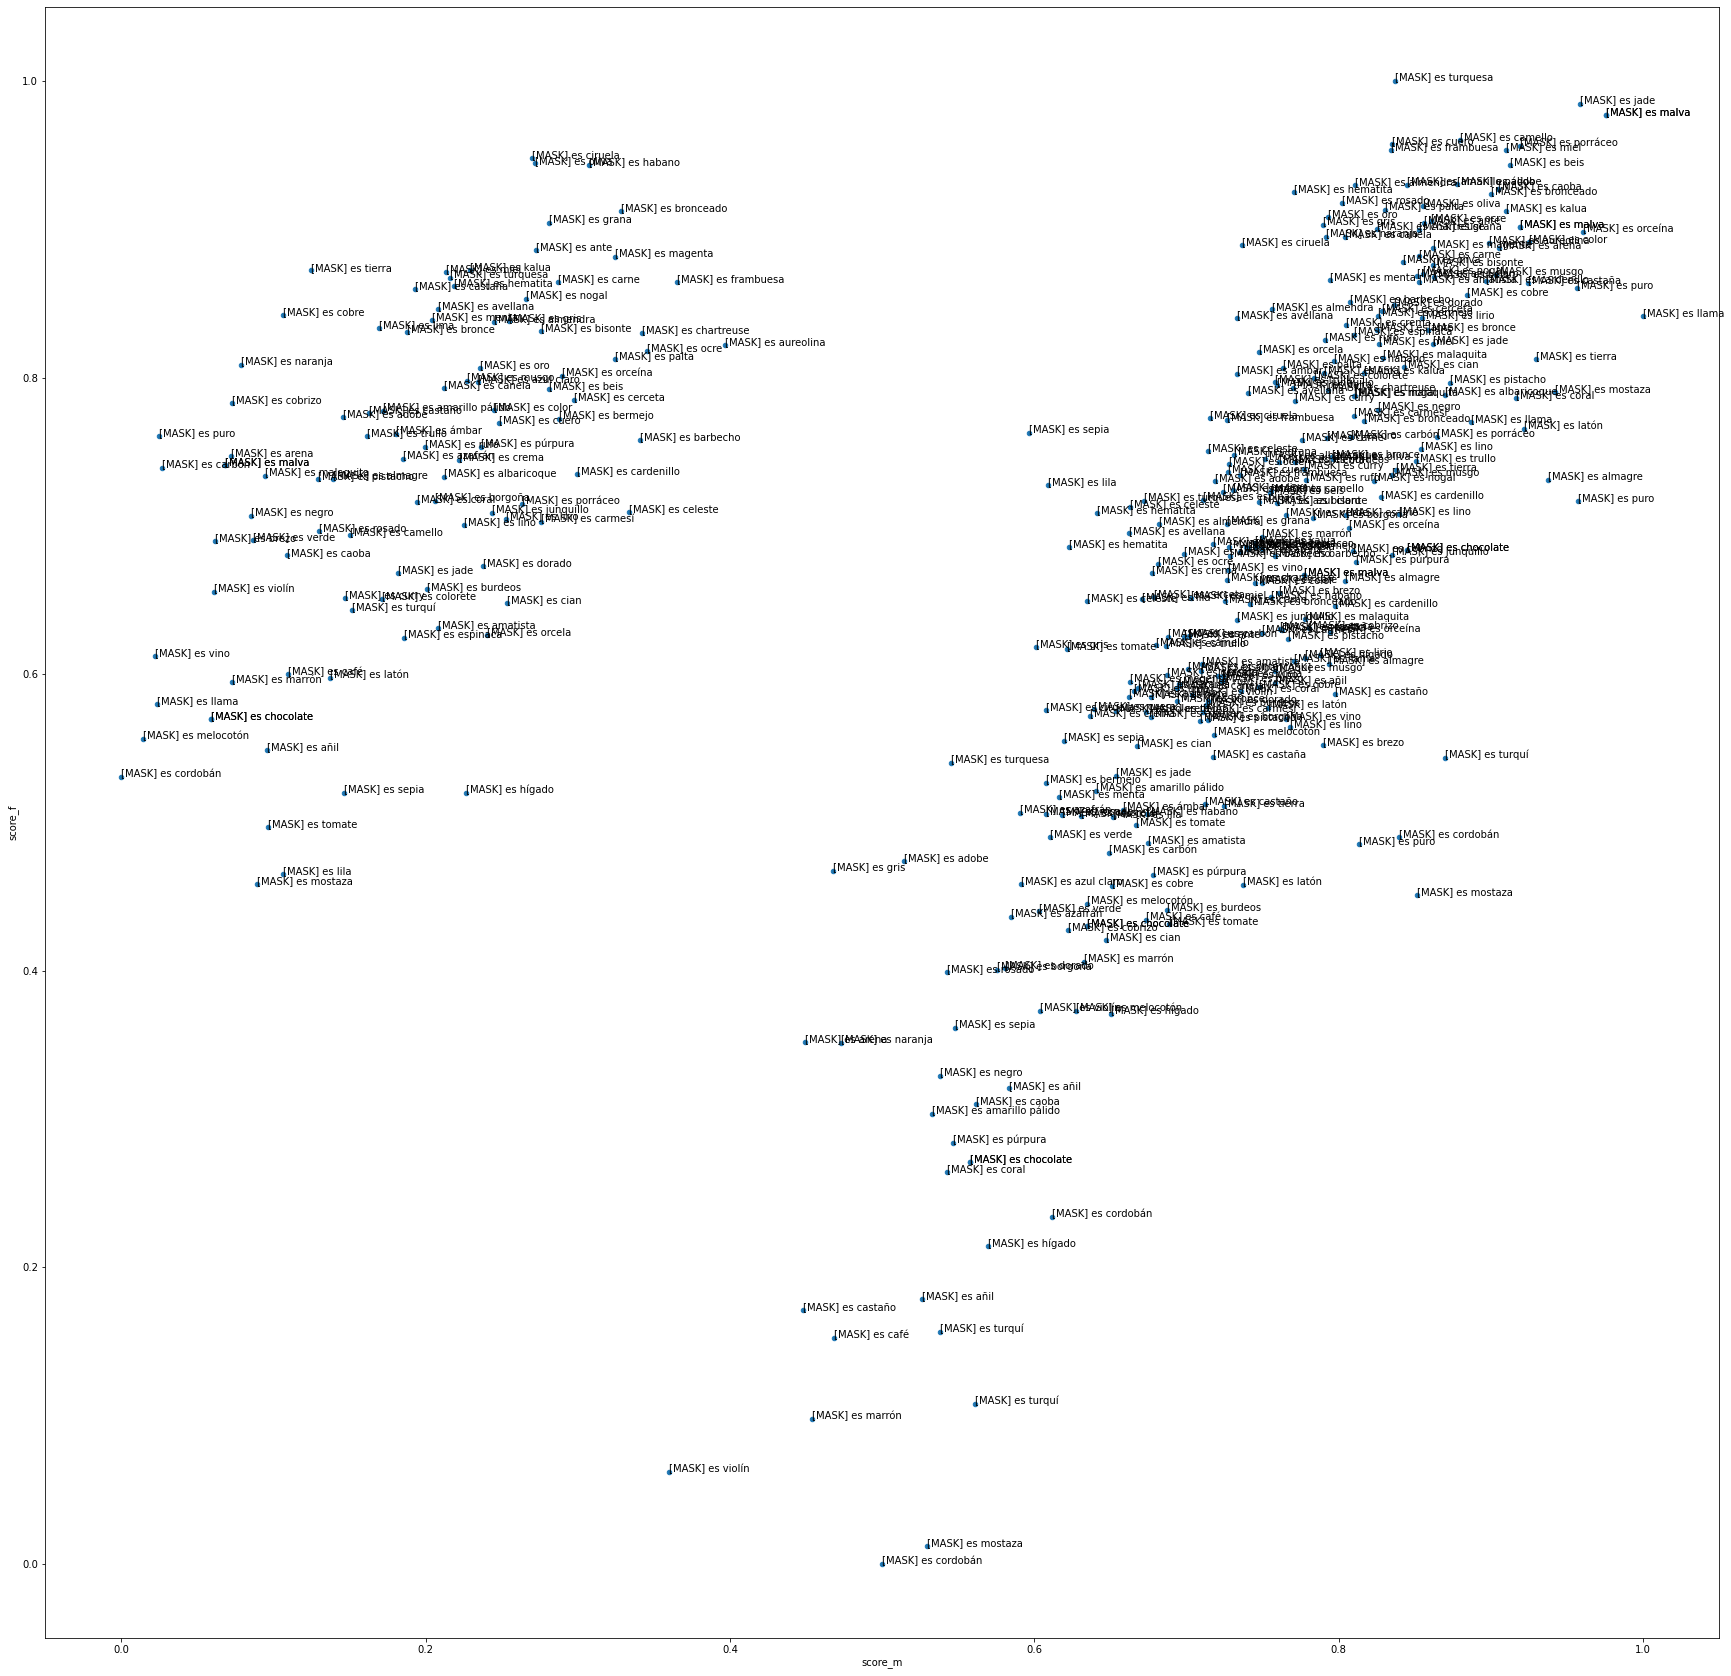

range(1, 30) [-107.0068893038536, -46.057166669361855, -20.318161590166714, -14.467101557784012, -11.567564483328038, -10.412972047159354, -9.219852429458621, -8.445677009074851, -7.472336746711785, -6.915112837565056, -6.413798662361519, -5.898272299299466, -5.428456406077737, -5.123191386451011, -4.913642726085545, -4.610628086991821, -4.463690020810413, -4.218728655313349, -4.0660984731566066, -3.8011343787878364, -3.7173557436652827, -3.5942364359391337, -3.3975969954324143, -3.267125428853183, -3.134285649384806, -3.0701823360717824, -3.0398615420717787, -2.932310803755866, -2.853611908306968]
[[0.62531328 0.62531328 0.74128809 0.65968304]
 [0.12406015 0.12406015 0.18997609 0.73847798]]


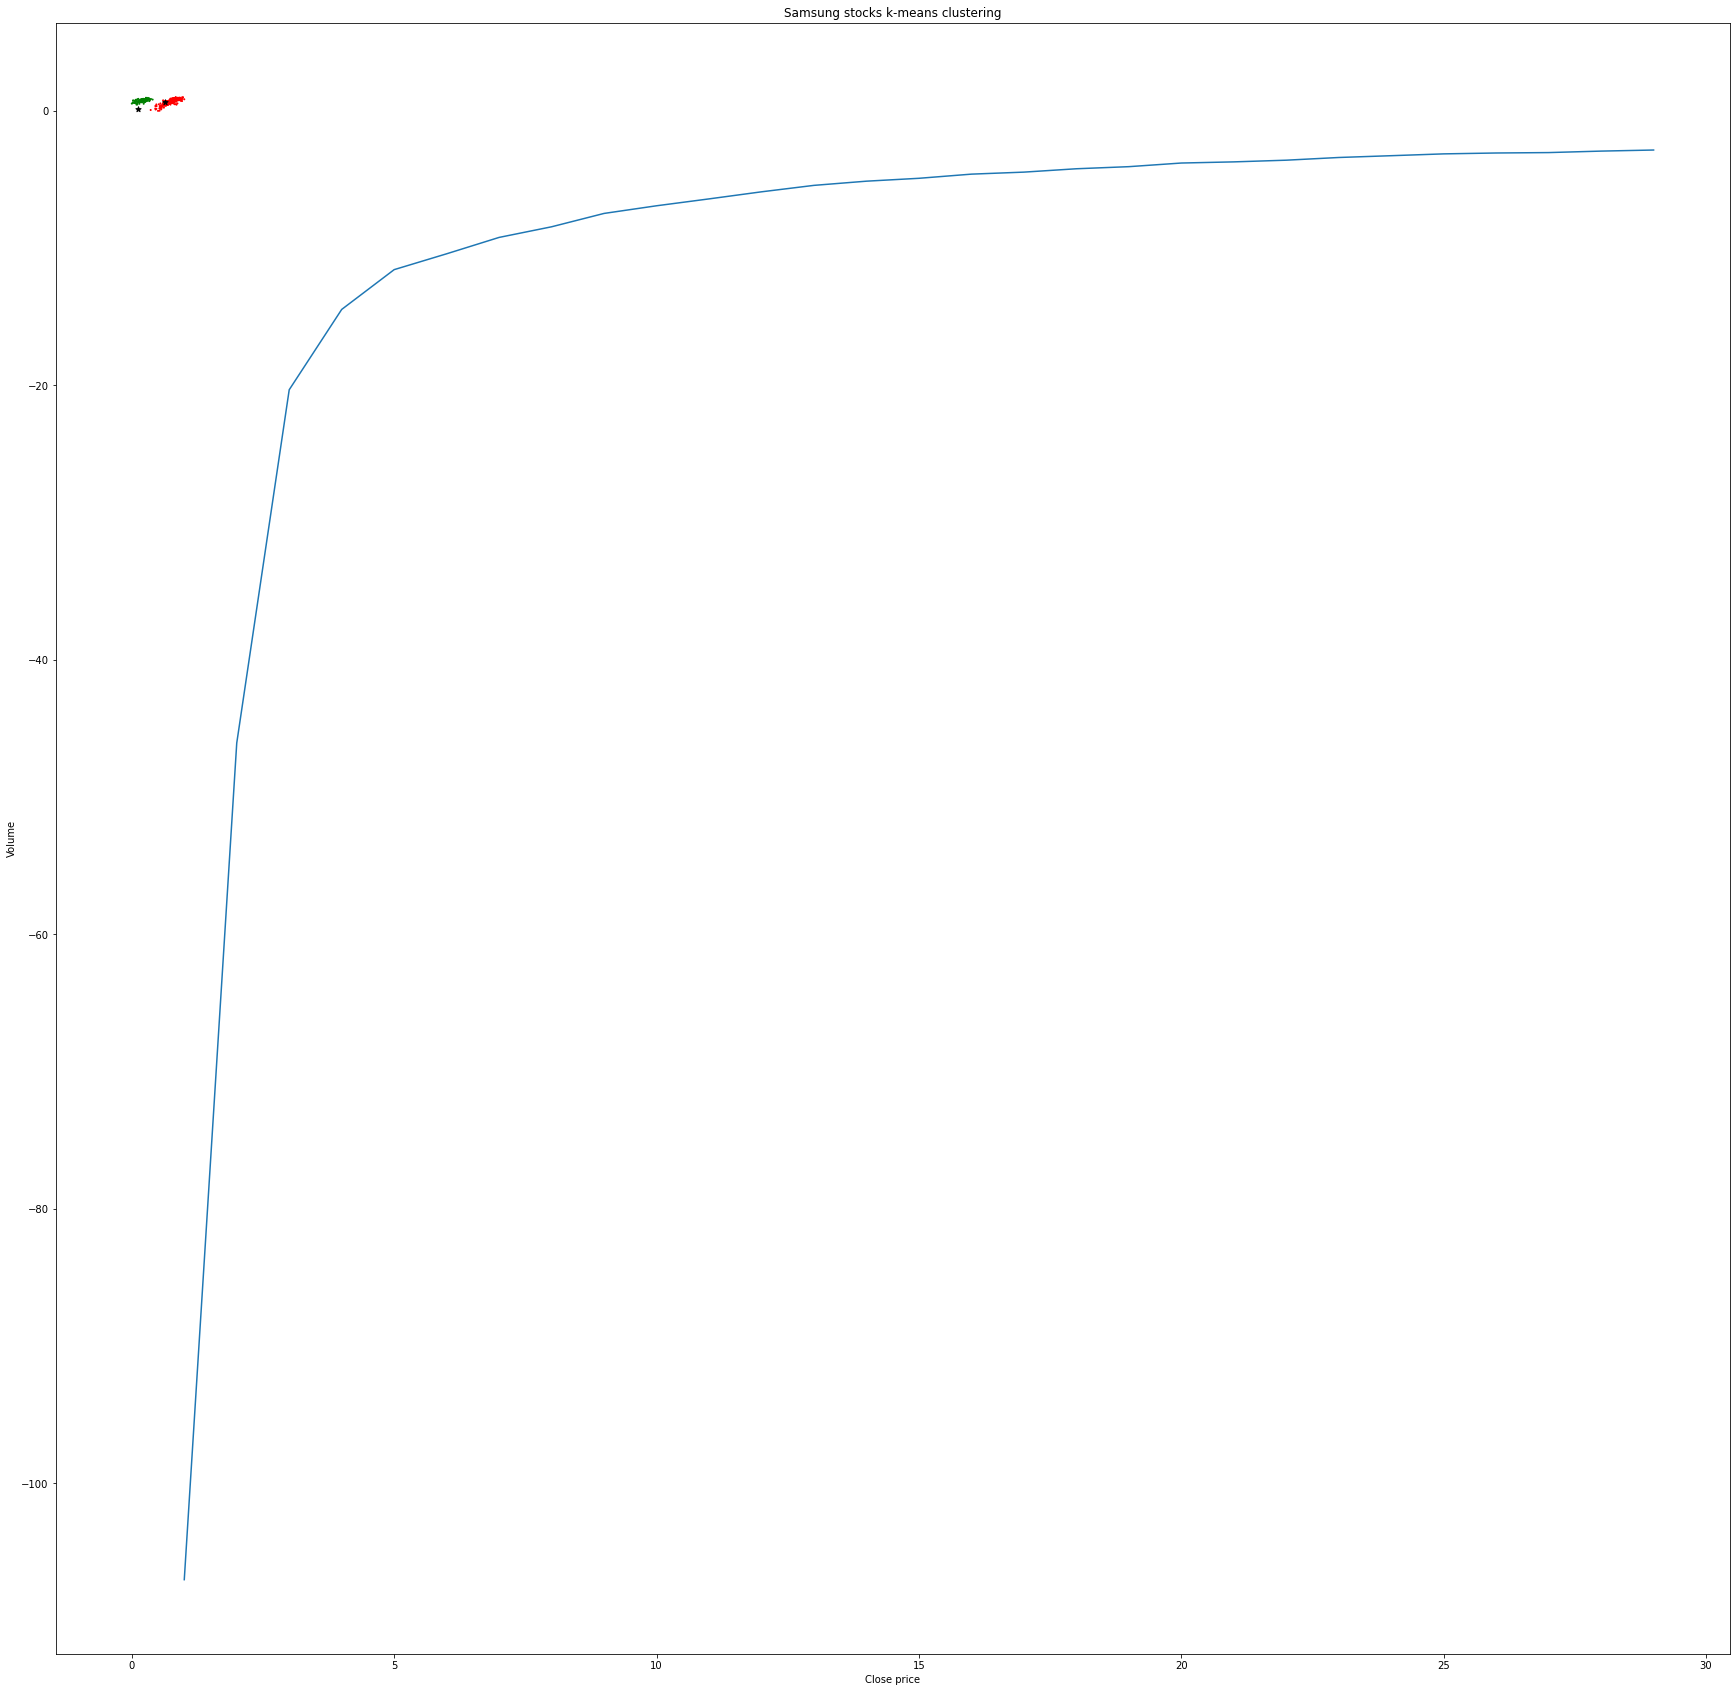

In [24]:
plot_all('results/Auto/genero-m1_es_adjetivocolores-m2.xlsx', True)

In [ ]:
plot_all('results/Auto/genero-m1_es_adjetivootros-m2.xlsx', True)

In [ ]:
plot_all('results/Auto/genero-m1_es_adjetivopositivo-m2.xlsx', True)


In [ ]:
plot_all('results/Auto/genero-m1_es_adjetivonegativo-m2.xlsx', True)


In [ ]:
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivocolores-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivootros-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivopositivo-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivonegativo-m2.xlsx')

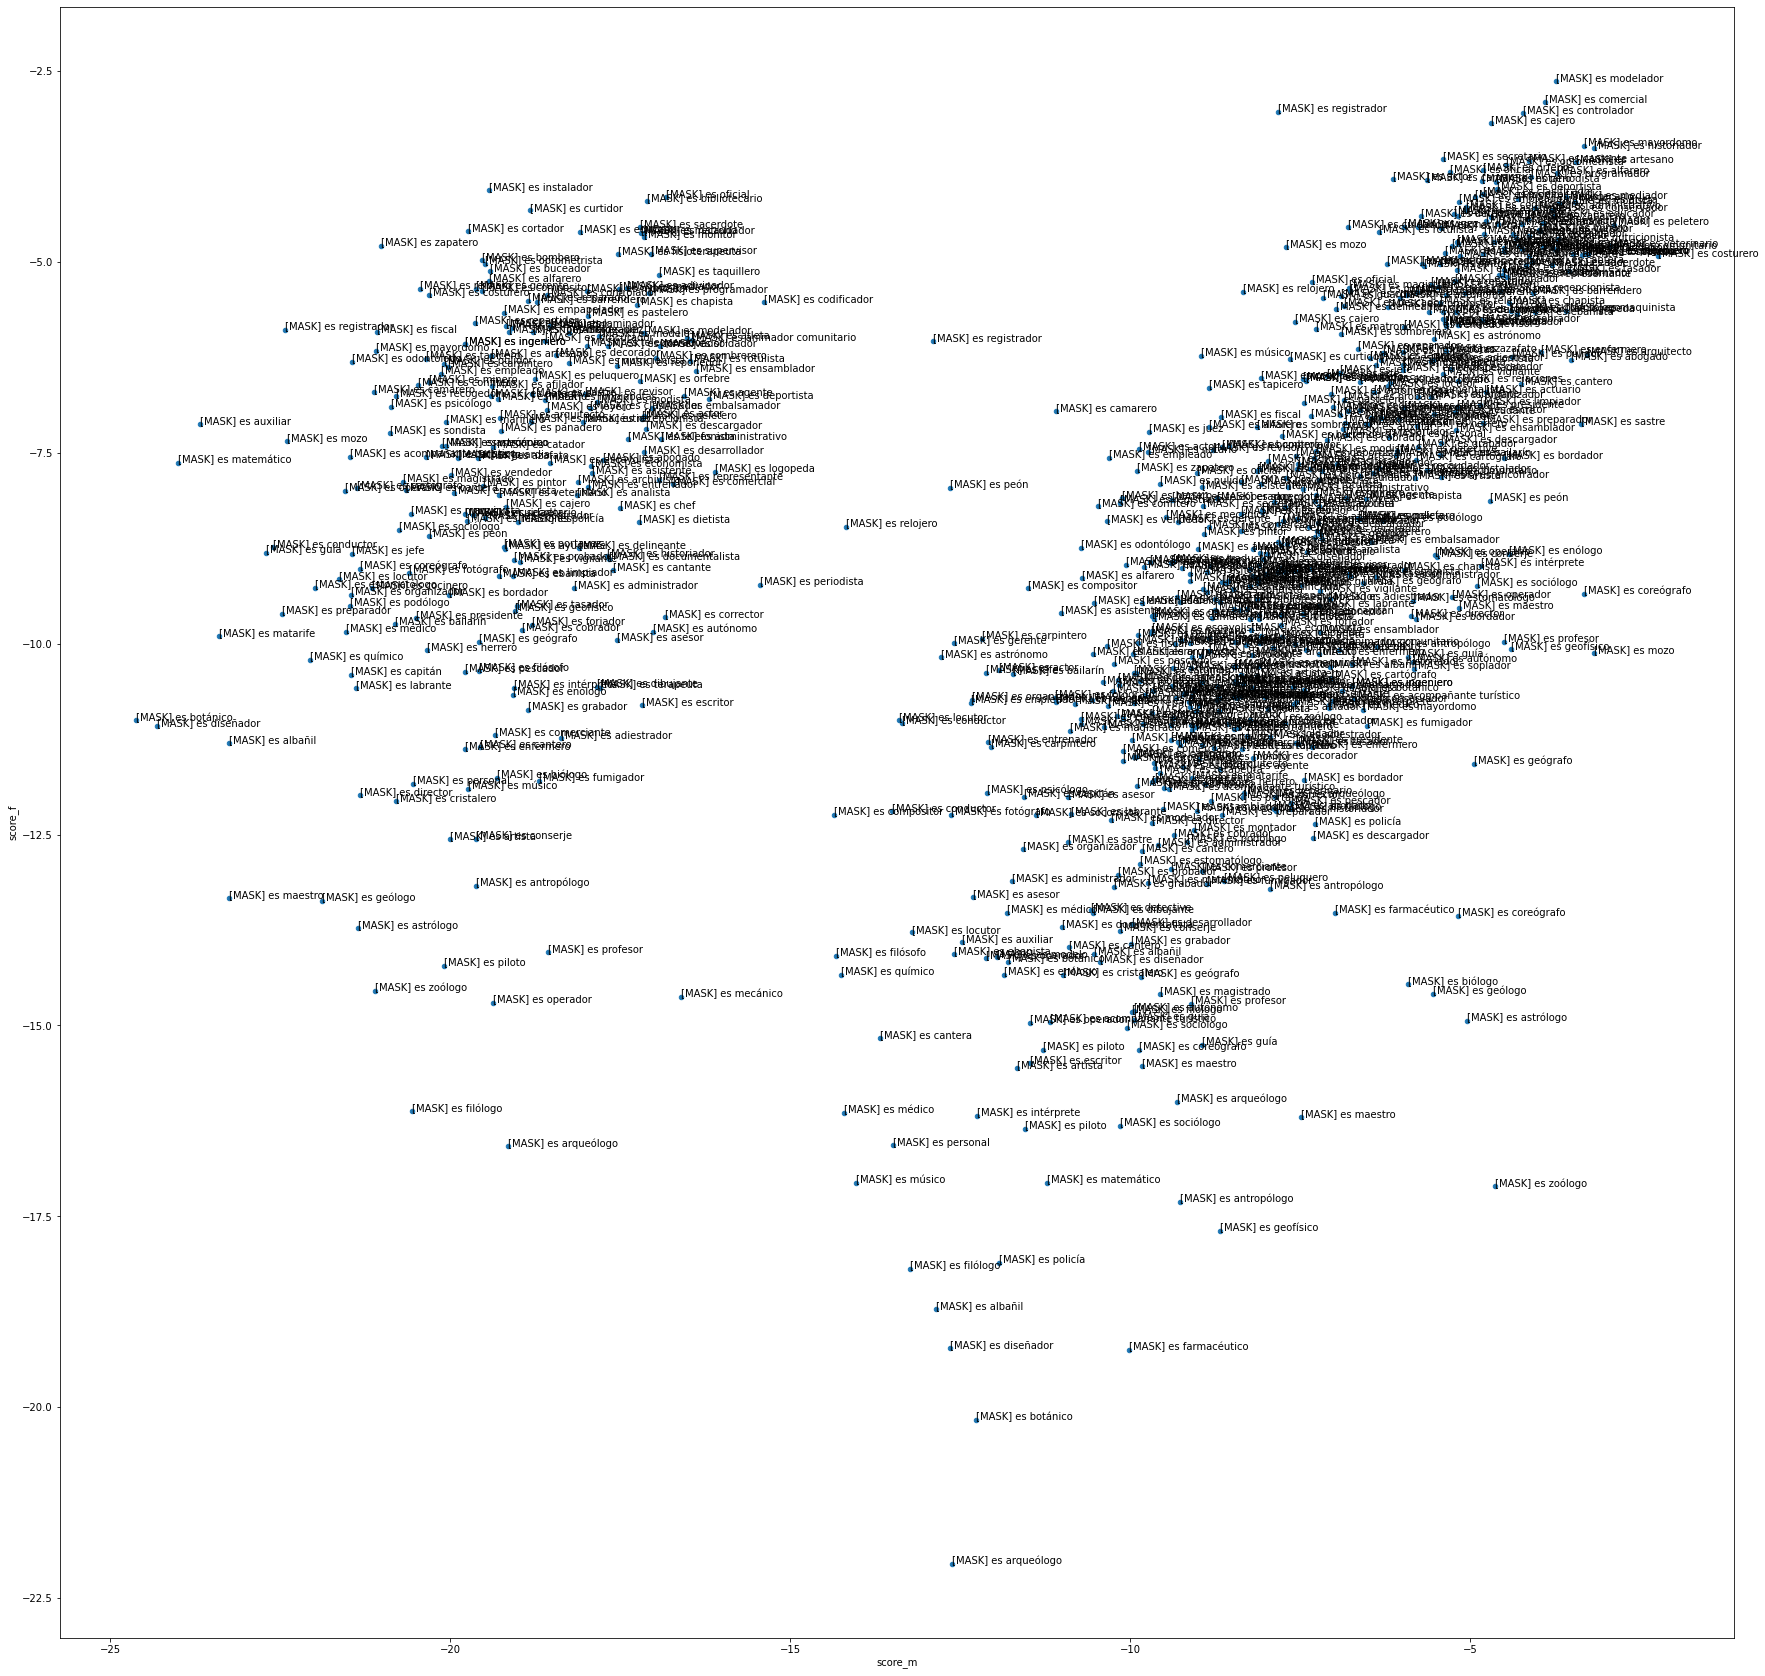

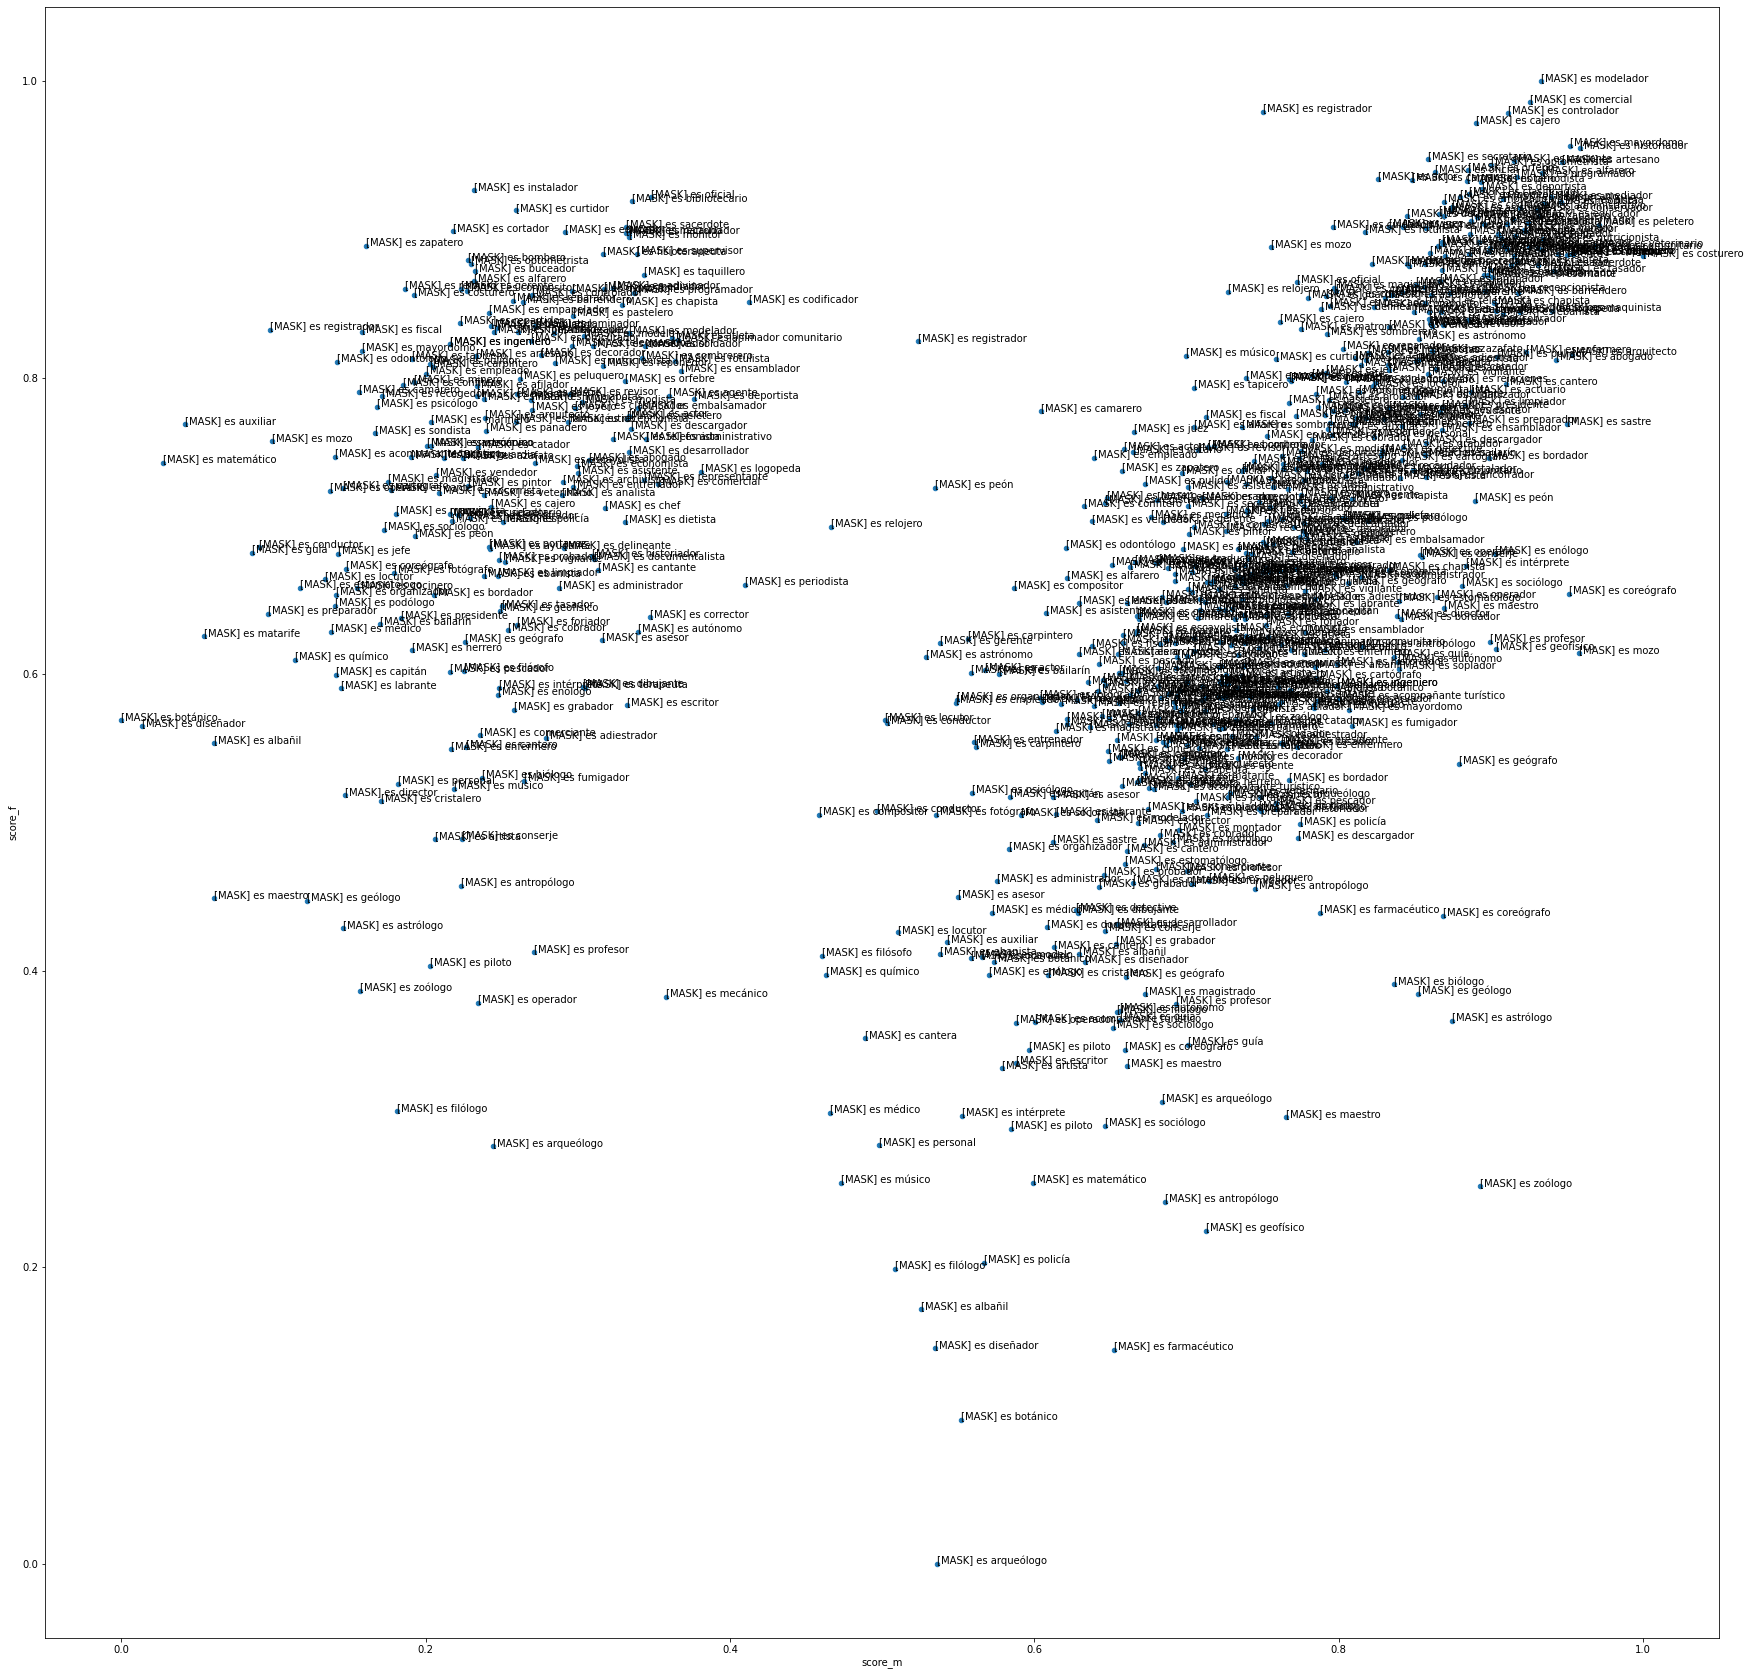

range(1, 30) [-209.8567120775025, -90.31056089897224, -36.74721461317029, -24.829098341632488, -21.892454500187828, -19.555994040113188, -17.304917632917938, -15.617827061918211, -14.29492734671066, -12.987857067006523, -11.82975322256443, -10.839024966081604, -10.342404663259464, -9.947739202317464, -9.563670390654249, -9.24170837433661, -8.911682845996568, -8.65876674243442, -8.400408273152776, -8.034738705059347, -7.88736736221003, -7.592494387817272, -7.369365054273965, -7.1685276860144, -6.990483372944983, -6.812843003972038, -6.677875321622534, -6.4046054898339735, -6.237087592135792]


AttributeError: 'list' object has no attribute 'predict'

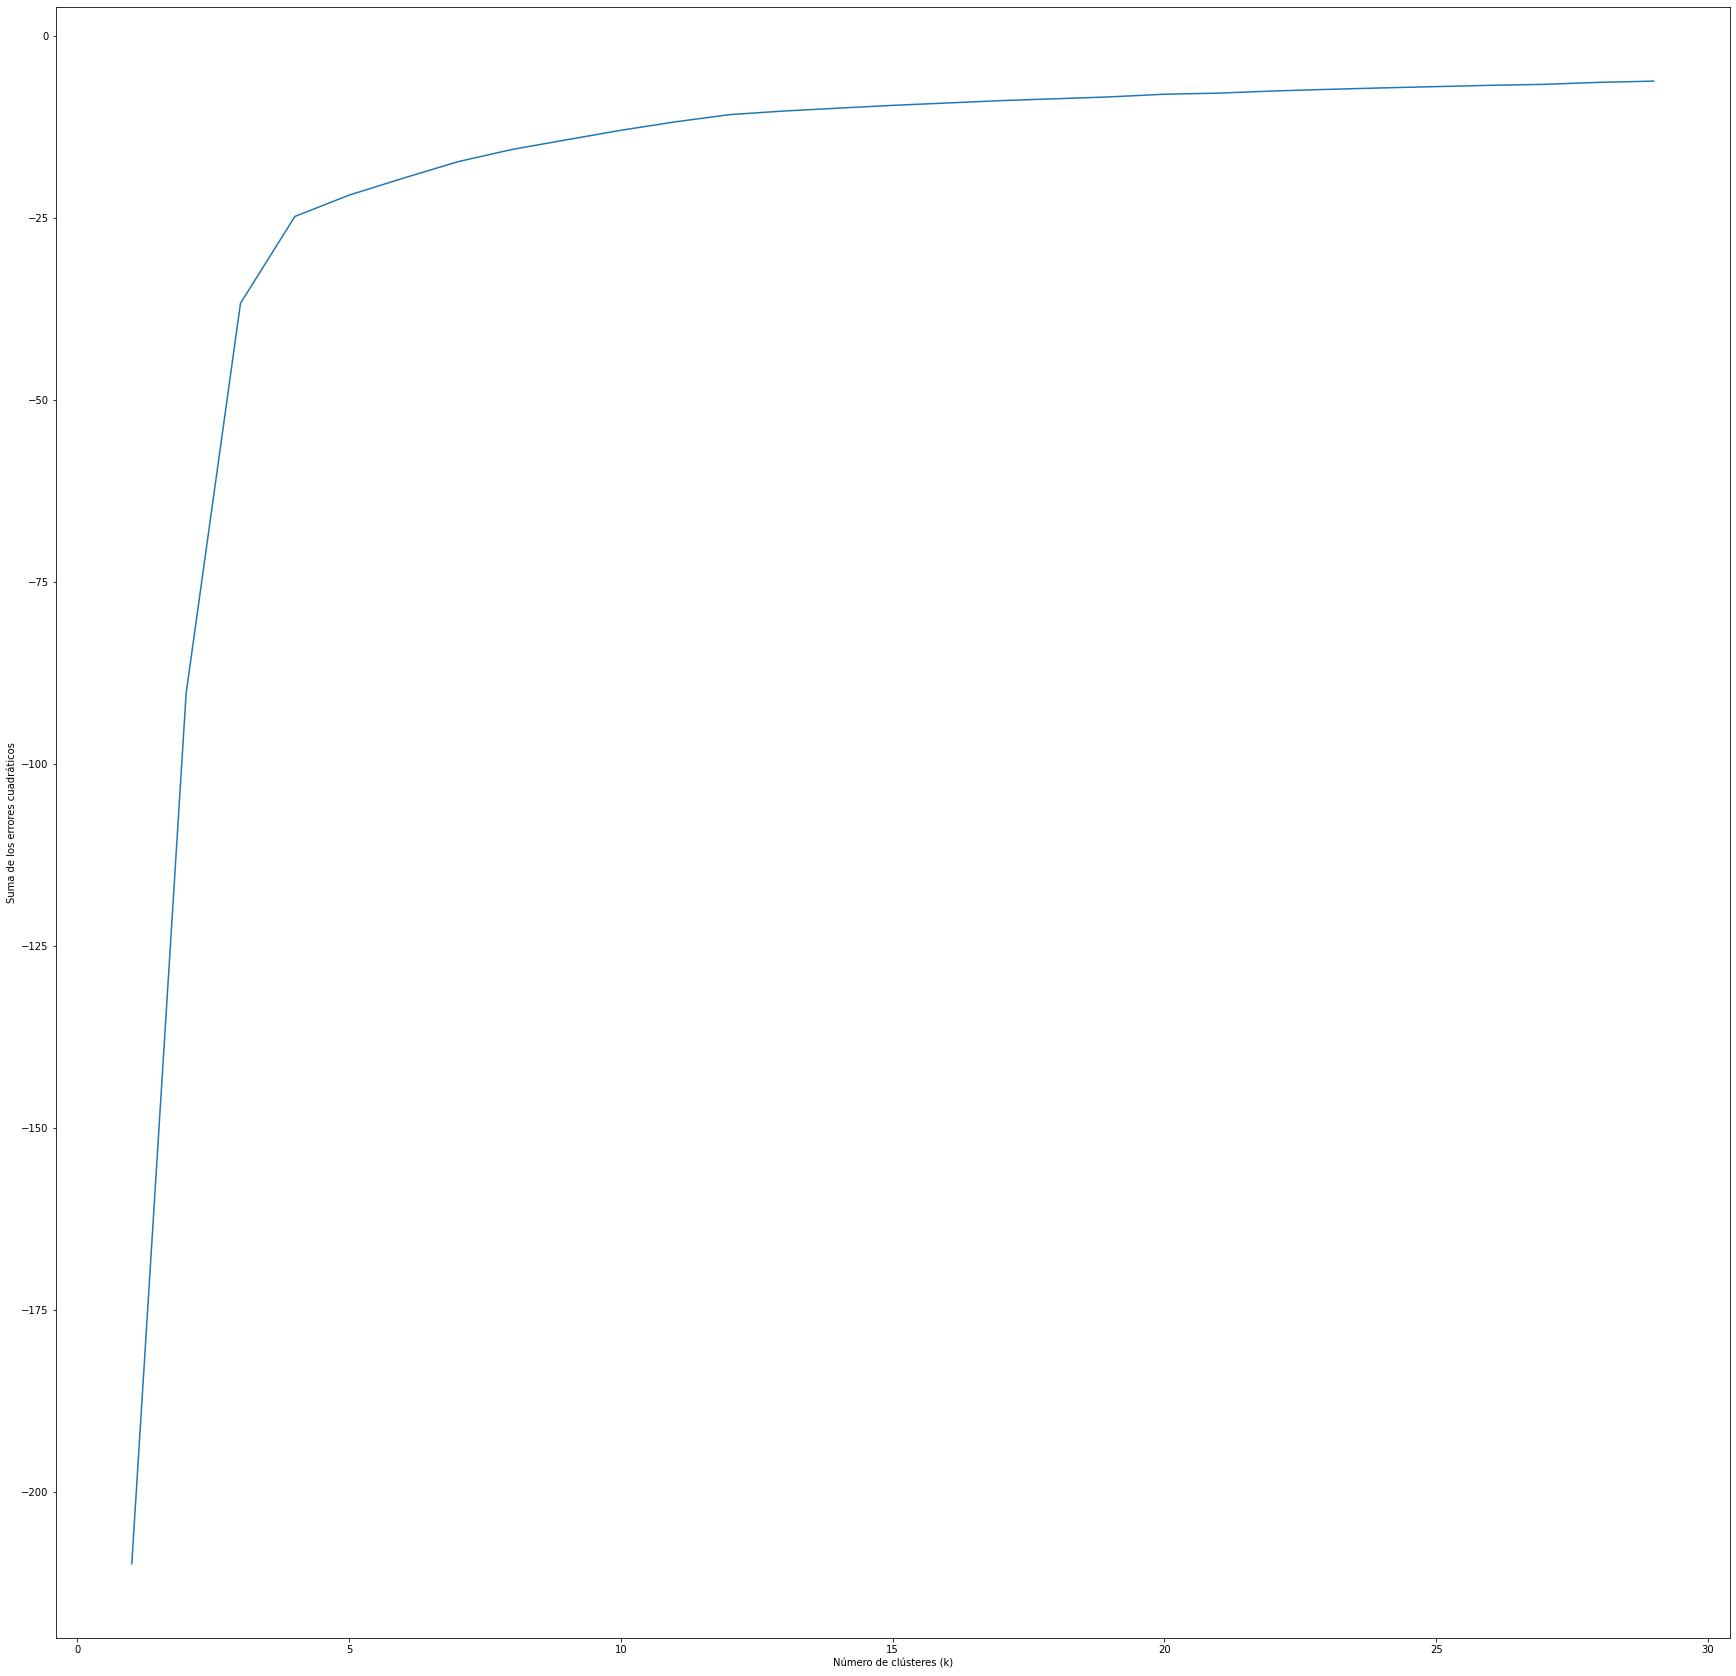

In [13]:
plot_all('results/Auto/genero-m1_es_profesion-m2.xlsx', True)